# Logistic Regression

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

hawks = pd.read_csv('Hawks.csv')
list(hawks.keys())

['rownames',
 'Month',
 'Day',
 'Year',
 'CaptureTime',
 'ReleaseTime',
 'BandNumber',
 'Species',
 'Age',
 'Sex',
 'Wing',
 'Weight',
 'Culmen',
 'Hallux',
 'Tail',
 'StandardTail',
 'Tarsus',
 'WingPitFat',
 'KeelFat',
 'Crop']

Source and description for the dataset:
https://rdrr.io/rforge/Stat2Data/man/Hawks.html

Code based on:
https://www.meganstodel.com/posts/replacing-the-iris-dataset/

In [2]:
# Create a simplified subproblem with a single feature variable

# Remove a few cases with missing data
hawks = hawks[~hawks['Wing'].isnull()]

# Select feature to predict (y) and feature to use in making predictions (X)
X = hawks[['Wing']].to_numpy()  # wing length
RT = hawks['Species'] == "RT"
y = RT.astype(int).to_numpy()  # 1 if Red-Tailed, else 0

In [3]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

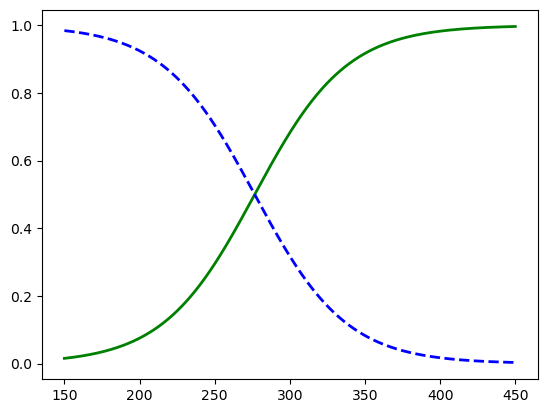

In [4]:
X_new = np.linspace(150, 450, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

# probability functions
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2,
          label="Red-Tailed")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
          label="Not Red-Tailed")

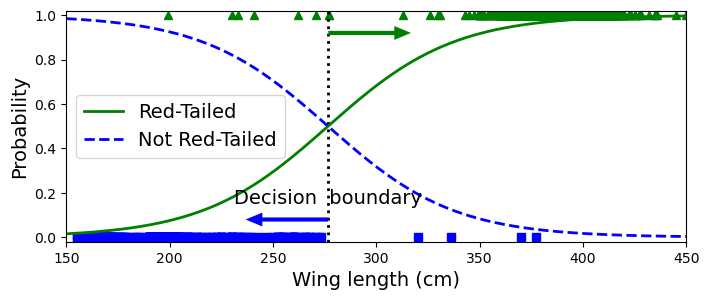

In [5]:
X_new = np.linspace(150, 450, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0].item()

plt.figure(figsize=(8, 3))

# plot the positions of the True data points for the three classes
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")

# vertical position of the decision boundary
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)

# probability functions
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2,
        label="Red-Tailed")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
        label="Not Red-Tailed")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary",
          fontsize=14, color="k", ha="center")
plt.annotate('', xy=(decision_boundary - 40, 0.08), xytext=(decision_boundary, 0.08),
             arrowprops=dict(facecolor='blue',edgecolor='none', shrink=0, width=3, headwidth=10))

plt.annotate('', xy=(decision_boundary + 40, 0.92), xytext=(decision_boundary, 0.92),
             arrowprops=dict(facecolor='green',edgecolor='none', shrink=0, width=3, headwidth=10))
plt.xlabel("Wing length (cm)", fontsize=14) # Change label
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([150, 450, -0.02, 1.02]) # Change axis range
plt.show()

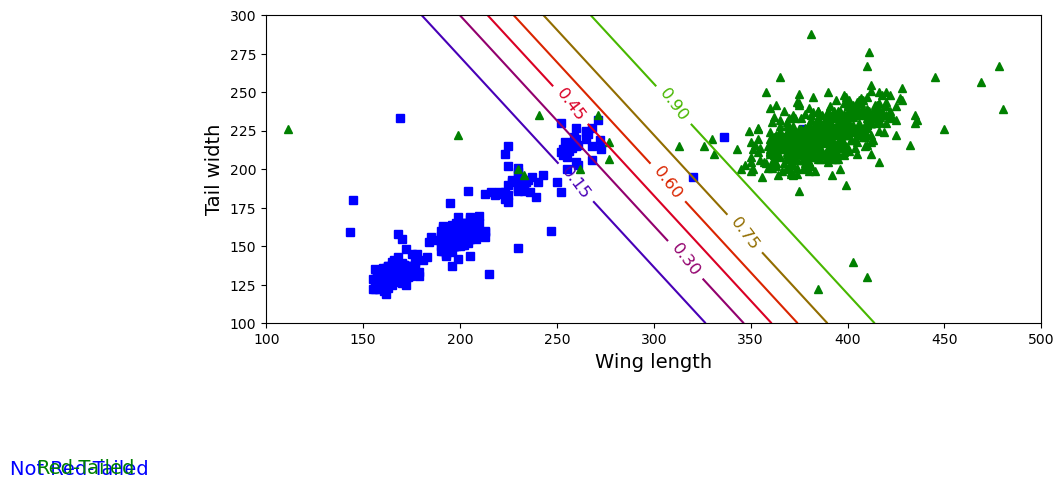

In [6]:
X = hawks[['Wing', 'Tail']].to_numpy()   # tail length, wing length
y = RT.astype(int).to_numpy()

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(150, 450, 500).reshape(-1, 1),
        np.linspace(100, 300, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))

# plot the positions of the True data points for the three classes
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

# plot the probability boundaries
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

# plot the decisionboundary
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)

plt.text(3.5, 1.5, "Not Red-Tailed", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Red-Tailed", fontsize=14, color="g", ha="center")
plt.xlabel("Wing length", fontsize=14)
plt.ylabel("Tail width", fontsize=14)
plt.axis([100, 500, 100, 300])
plt.show()

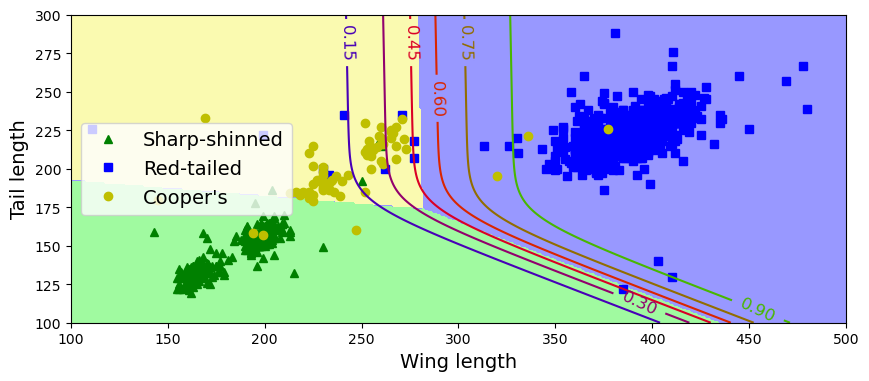

In [7]:
# For softmax regression, needs species as int
hawks['Species_Category'] = hawks['Species'].astype('category')
hawks['Species_Category'] = hawks['Species_Category'].cat.codes

X = hawks[['Wing', 'Tail']].to_numpy()
y = hawks['Species_Category'].to_numpy()

softmax_reg = LogisticRegression(solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(100, 500, 500).reshape(-1, 1),
        np.linspace(100, 300, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))

# plot the positions of the True data points for the three classes
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Sharp-shinned")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Red-tailed")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Cooper's")

# plot decision regions for the three classes
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)

# plot teh probability boundaries
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.xlabel("Wing length", fontsize=14)
plt.ylabel("Tail length", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([100, 500, 100, 300])
plt.show()